In [180]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
#gr = []
#for i in range(1,7):
#    with open('grasshoppers/grasshoppers%d.json' % i) as f:
#        file_data = json.loads(f.read())
#        gr.extend(file_data['recordings'])
#dat = pd.DataFrame(gr)
#dat.to_csv('grasshoppers/metadata.csv')
dat = pd.read_csv('grasshoppers/metadata.csv')

In [182]:
sum(map(time_to_seconds, dat.length.values)) / 3600

81.415

In [183]:
# find species with at least 5 minutes of recordings
def time_to_seconds(x):
    result = 0
    for part in x.split(':'):
        result = result*60 + float(part)
    return result

common_sp = [s for s in sp if sum(map(time_to_seconds, dat[dat.sp == s].length.values)) >= 300.0]

In [186]:
import librosa
from IPython.display import Audio
sig, _ = librosa.load('grasshoppers/audio/%s.wav' % dat.iloc[9].id)
spec = librosa.feature.melspectrogram(
    y = sig, sr = 22050, fmin = 150, n_fft = 512,
    hop_length = 130, n_mels = 80, norm = 100.0, power = 0.6)

In [187]:
Audio(sig, rate = 22050)

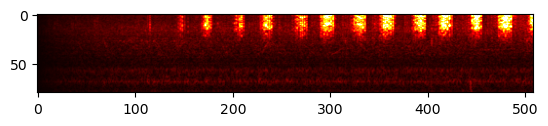

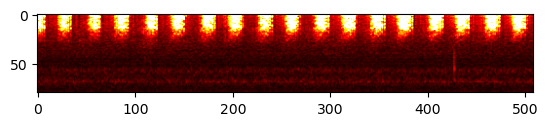

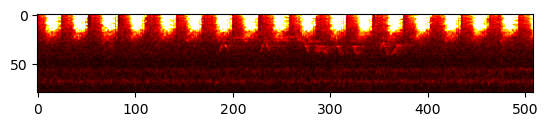

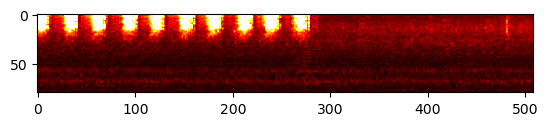

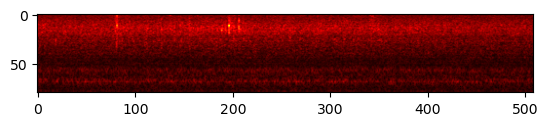

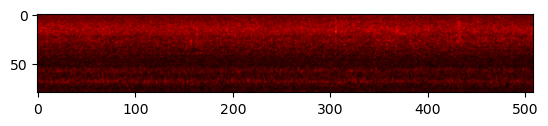

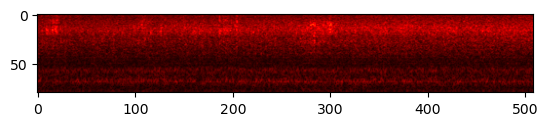

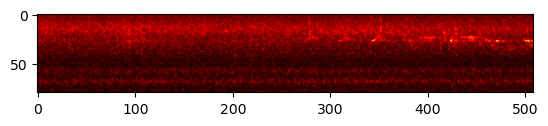

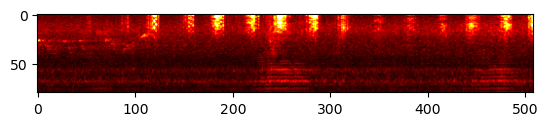

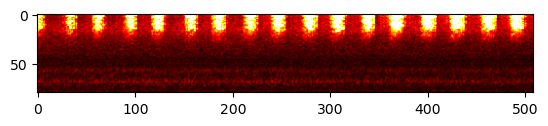

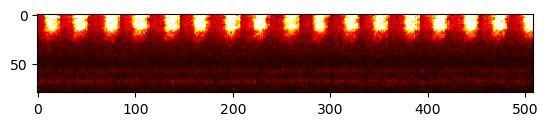

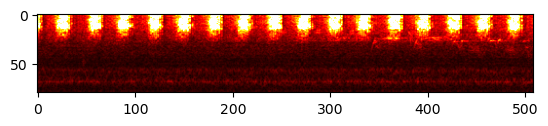

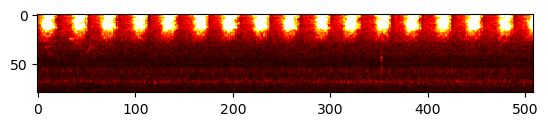

In [188]:
for i in range(spec.shape[1]//509):
    plt.imshow(spec[::-1,i*509:(i+1)*509], cmap = 'hot', vmin = 0, vmax = 4)
    plt.show()